# Aufgabe 7

## Importe

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os.path
from os import getcwd
import time
import warnings
warnings.filterwarnings("ignore")

## ML Importe

Verwendete Algorithmen:
- Lineare Modelle:
    - Lineare Regression
    - Ridge
    - Bayesian Regression
    - Logistic Regression
    - Stochastic Gradient Descend
- Support Vector Machine
- Nearest Neighbor
- Gaussian Naive Bayes
- DecisionTree
- RandomForest

In [2]:
from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge, LogisticRegression, SGDRegressor
from sklearn.linear_model import RidgeClassifier, SGDClassifier

from sklearn.svm import SVR, NuSVR, SVC, NuSVC

from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier, NearestCentroid

from sklearn.naive_bayes import GaussianNB

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

## Laden der Resourcen

### Datenquelle

Verwendete Daten: [Kaggle - Heart Attack Analysis Prediction Dataset](https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset)

Weitere Quelle: [Archiv der Donald Bren School of Information & Computer Sciences](http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/)

### Daten und Beschreibung

Entnommen aus der Datenbeschreibung

* **Age:** Age of the patient
* **Sex:** Gender of the person
* **exng:** exercise induced angina (1 = yes; 0 = no)
* **caa:** number of major vessels (0-3)
* **cp:** Chest Pain type
    * **Value 1:** typical angina
    * **Value 2:** atypical angina
    * **Value 3:** non-anginal pain
    * **Value 4:** asymptomatic
* **trtbps:** resting blood pressure (in mm Hg)
* **chol:** cholestoral in mg/dl fetched via BMI sensor
* **fbs:** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* **rest_ecg:** resting electrocardiographic results
    * **Value 0:** normal
    * **Value 1:** having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * **Value 2:** showing probable or definite left ventricular hypertrophy by Estes" criteria
* **thalach:** maximum heart rate achieved
* **output:** Target variable
    * **target:** 0 = less chance of heart attack 1 = more chance of heart attack
    * diagnosis of heart disease (angiographic disease status)
        * Value 0: < 50% diameter narrowing
        * Value 1: > 50% diameter narrowing
        * (in any major vessel)
* **oldpeak:** Previous peak
* **slp:** Slope
* **thall:** Thal rate

In [3]:
pd.options.display.float_format = '{:.4f}'.format

cwd = os.getcwd()
file = os.path.join(cwd, "Datasets","heart.csv")
data = pd.read_csv(file)

### Erkunden der Daten

Um die Auswahl der Parameter zu verringern, wird der Datensatz zunächst genauer betrachtet und vorverarbeitet.

#### Allgemeine Informationen

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Umbenennen zur besseren Verständlichkeit

In [5]:
column_names = ["Alter", "Geschlecht", "Brustschmerz-Typ", "Ruhe-Blutdruck", "Cholesterin", "Nüchtern-Blutzucker", "Ruhe-EKG", "Max. erreichte Herzfrequenz",
       "Belastungsangina", "ST-Senkung", "Steigung des Peaks der ST Strecke", "Anzahl der großen Blutgefäße", "Thalassämie", "Angiographischer Krankheitsstatus"]
data.columns = column_names
t_name = column_names[-1]

Überblick über die Daten

In [6]:
data_info = data.info()
data_disobs = data.nunique()

print(data_info)
print("__________"*5)
print("Einzigartige Werte")
print(data_disobs)
print("__________"*5)
print("Anzahl der leeren Werte")
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Alter                              303 non-null    int64  
 1   Geschlecht                         303 non-null    int64  
 2   Brustschmerz-Typ                   303 non-null    int64  
 3   Ruhe-Blutdruck                     303 non-null    int64  
 4   Cholesterin                        303 non-null    int64  
 5   Nüchtern-Blutzucker                303 non-null    int64  
 6   Ruhe-EKG                           303 non-null    int64  
 7   Max. erreichte Herzfrequenz        303 non-null    int64  
 8   Belastungsangina                   303 non-null    int64  
 9   ST-Senkung                         303 non-null    float64
 10  Steigung des Peaks der ST Strecke  303 non-null    int64  
 11  Anzahl der großen Blutgefäße       303 non-null    int64  

#### Statistiken und Korrelation

In [7]:
data_desc = data.describe()
data_desc

,Alter,Geschlecht,Brustschmerz-Typ,Ruhe-Blutdruck,Cholesterin,Nüchtern-Blutzucker,Ruhe-EKG,Max. erreichte Herzfrequenz,Belastungsangina,ST-Senkung,Steigung des Peaks der ST Strecke,Anzahl der großen Blutgefäße,Thalassämie,Angiographischer Krankheitsstatus
count,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000
mean,54.3663,0.6832,0.9670,131.6238,246.2640,0.1485,0.5281,149.6469,0.3267,1.0396,1.3993,0.7294,2.3135,0.5446
std,9.0821,0.4660,1.0321,17.5381,51.8308,0.3562,0.5259,22.9052,0.4698,1.1611,0.6162,1.0226,0.6123,0.4988
min,29.0000,0.0000,0.0000,94.0000,126.0000,0.0000,0.0000,71.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,47.5000,0.0000,0.0000,120.0000,211.0000,0.0000,0.0000,133.5000,0.0000,0.0000,1.0000,0.0000,2.0000,0.0000
50%,55.0000,1.0000,1.0000,130.0000,240.0000,0.0000,1.0000,153.0000,0.0000,0.8000,1.0000,0.0000,2.0000,1.0000
75%,61.0000,1.0000,2.0000,140.0000,274.5000,0.0000,1.0000,166.0000,1.0000,1.6000,2.0000,1.0000,3.0000,1.0000
max,77.0000,1.0000,3.0000,200.0000,564.0000,1.0000,2.0000,202.0000,1.0000,6.2000,2.0000,4.0000,3.0000,1.0000


In [8]:
data_corr = data.select_dtypes(include=["float64","int64"]).corr()
data_corr

,Alter,Geschlecht,Brustschmerz-Typ,Ruhe-Blutdruck,Cholesterin,Nüchtern-Blutzucker,Ruhe-EKG,Max. erreichte Herzfrequenz,Belastungsangina,ST-Senkung,Steigung des Peaks der ST Strecke,Anzahl der großen Blutgefäße,Thalassämie,Angiographischer Krankheitsstatus
Alter,1.0000,-0.0984,-0.0687,0.2794,0.2137,0.1213,-0.1162,-0.3985,0.0968,0.2100,-0.1688,0.2763,0.0680,-0.2254
Geschlecht,-0.0984,1.0000,-0.0494,-0.0568,-0.1979,0.0450,-0.0582,-0.0440,0.1417,0.0961,-0.0307,0.1183,0.2100,-0.2809
Brustschmerz-Typ,-0.0687,-0.0494,1.0000,0.0476,-0.0769,0.0944,0.0444,0.2958,-0.3943,-0.1492,0.1197,-0.1811,-0.1617,0.4338
Ruhe-Blutdruck,0.2794,-0.0568,0.0476,1.0000,0.1232,0.1775,-0.1141,-0.0467,0.0676,0.1932,-0.1215,0.1014,0.0622,-0.1449
Cholesterin,0.2137,-0.1979,-0.0769,0.1232,1.0000,0.0133,-0.1510,-0.0099,0.0670,0.0540,-0.0040,0.0705,0.0988,-0.0852
Nüchtern-Blutzucker,0.1213,0.0450,0.0944,0.1775,0.0133,1.0000,-0.0842,-0.0086,0.0257,0.0057,-0.0599,0.1380,-0.0320,-0.0280
Ruhe-EKG,-0.1162,-0.0582,0.0444,-0.1141,-0.1510,-0.0842,1.0000,0.0441,-0.0707,-0.0588,0.0930,-0.0720,-0.0120,0.1372
Max. erreichte Herzfrequenz,-0.3985,-0.0440,0.2958,-0.0467,-0.0099,-0.0086,0.0441,1.0000,-0.3788,-0.3442,0.3868,-0.2132,-0.0964,0.4217
Belastungsangina,0.0968,0.1417,-0.3943,0.0676,0.0670,0.0257,-0.0707,-0.3788,1.0000,0.2882,-0.2577,0.1157,0.2068,-0.4368
ST-Senkung,0.2100,0.0961,-0.1492,0.1932,0.0540,0.0057,-0.0588,-0.3442,0.2882,1.0000,-0.5775,0.2227,0.2102,-0.4307


In [9]:
print(data.head(15))

    Alter  Geschlecht  Brustschmerz-Typ  Ruhe-Blutdruck  Cholesterin  \
0      63           1                 3             145          233   
1      37           1                 2             130          250   
2      41           0                 1             130          204   
3      56           1                 1             120          236   
4      57           0                 0             120          354   
5      57           1                 0             140          192   
6      56           0                 1             140          294   
7      44           1                 1             120          263   
8      52           1                 2             172          199   
9      57           1                 2             150          168   
10     54           1                 0             140          239   
11     48           0                 2             130          275   
12     49           1                 1             130         

#### Aufteilung der Daten

Unterteilung der Daten in kategorische und kontinuierliche Daten.<br />
Die Grenze wird in diesem Fall bei 4 festgelegt, was sich aus der Beschreibung und der Betrachtung der einzigartigen Werte ableiten lässt.

In [10]:
split_value = 4

cat_data = data.loc[:, data_disobs <= split_value]

con_data = data.loc[:, data_disobs > split_value]

Aufteilung der Daten bezüglich der zwei Ausgabewerte.

In [11]:
target0 = data[data[t_name] == 0]
target1 = data[data[t_name] == 1]

# Farbenwhal zur Darstellung
color0 = "#e5942f"
color1 = "#871282"

#### Visualisierung

##### Kontinuierliche Daten

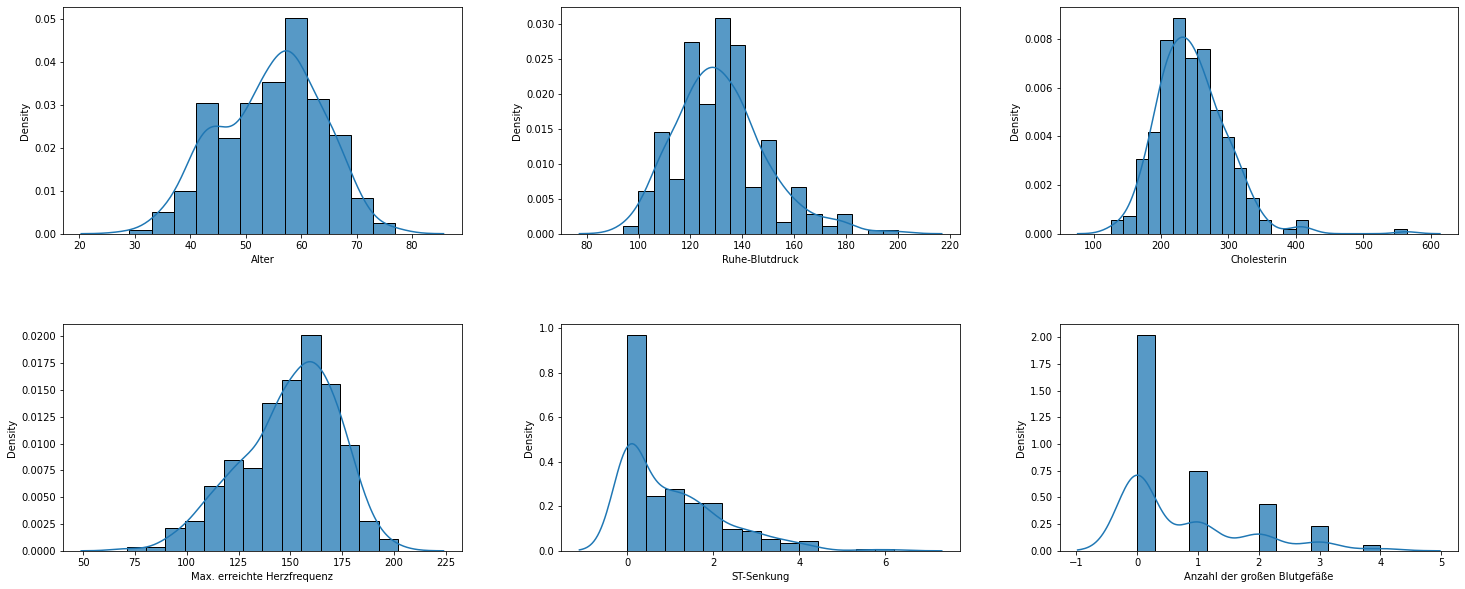

In [12]:
y_max = min(3, con_data.columns.size)
num_row = np.ceil(con_data.columns.size/y_max).astype("int")

fig = plt.figure(figsize=(25, 10))
gs = fig.add_gridspec(num_row, y_max)
gs.update(wspace=0.25, hspace=0.4)

def getSpValue(row, col) -> int:
    return row * y_max + col

sub_p = []

for row in range(num_row):
    for col in range(y_max):
        sp_tmp = fig.add_subplot(gs[row,col])
        sub_p.append(sp_tmp)

i = 0
for para in con_data:
    sns.histplot(con_data[para], ax=sub_p[i], stat="density")
    sns.kdeplot(con_data[para], ax=sub_p[i])
    i += 1

Aufspalten der Daten nach Ergebnis (output).

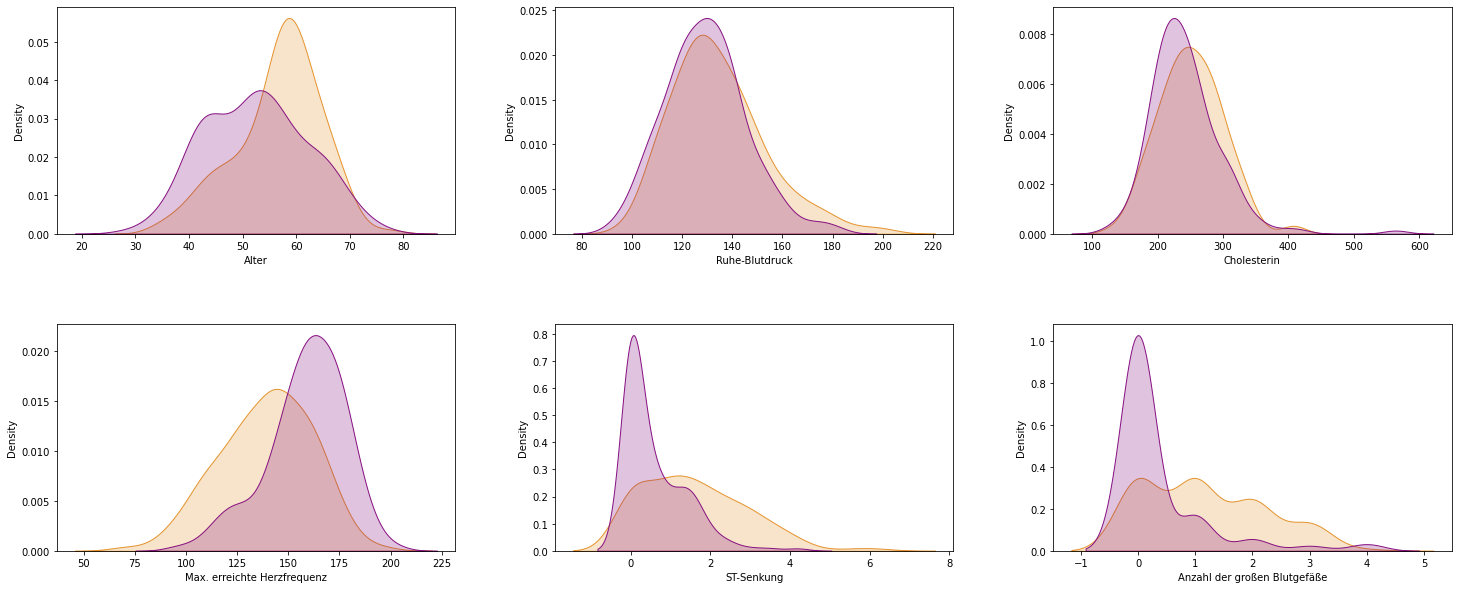

In [13]:
fig2 = plt.figure(figsize=(25, 10))
gs2 = fig2.add_gridspec(num_row, y_max)
gs2.update(wspace=0.25, hspace=0.4)

sub_p = []

for row in range(num_row):
    for col in range(y_max):
        sp_tmp = fig2.add_subplot(gs2[row,col])
        sub_p.append(sp_tmp)

i = 0
for para in con_data:
    #sns.histplot(target0[para], ax=sub_p[i], stat="density")
    sns.kdeplot(target0[para], ax=sub_p[i], color=color0, shade= True)
    #sns.histplot(target1[para], ax=sub_p[i], stat="density")
    sns.kdeplot(target1[para], ax=sub_p[i], color=color1, shade = True)
    i += 1

##### Kategorische Daten

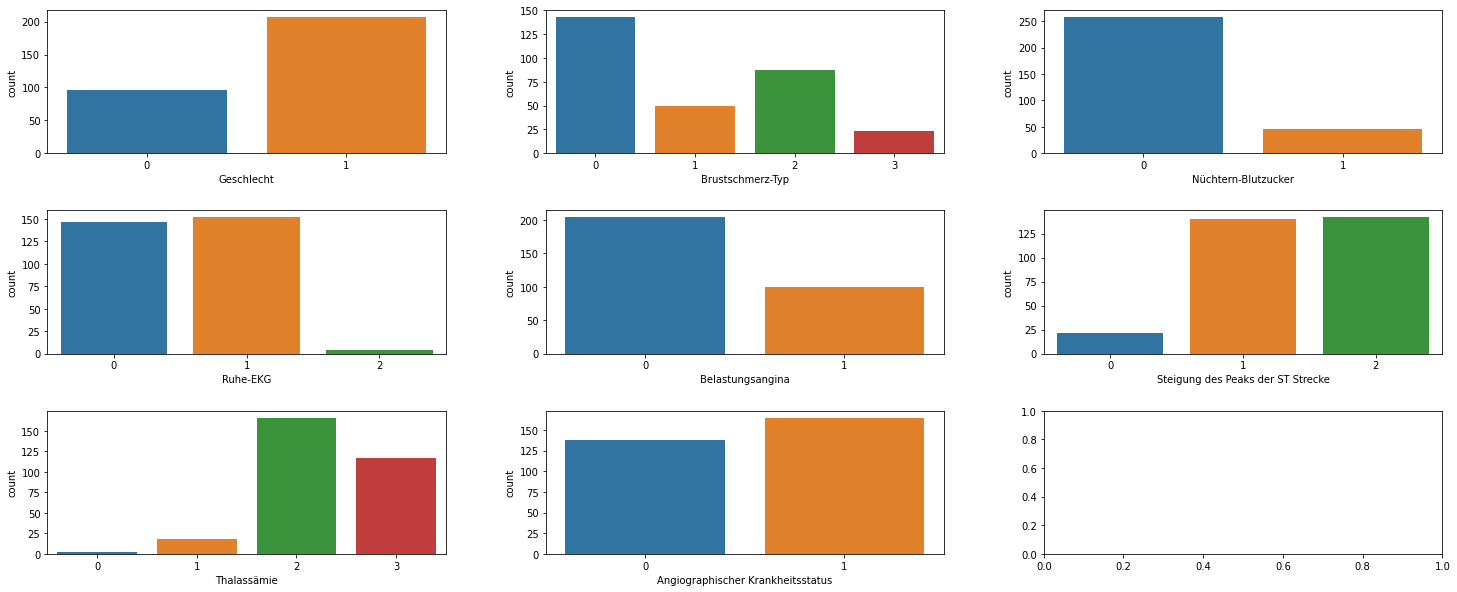

In [14]:
num_row = np.ceil(cat_data.columns.size/y_max).astype("int")

fig3 = plt.figure(figsize=(25, 10))
gs3 = fig3.add_gridspec(num_row, y_max)
gs3.update(wspace=0.25, hspace=0.4)

sub_p = []

for row in range(num_row):
    for col in range(y_max):
        sp_tmp = fig3.add_subplot(gs3[row,col])
        sub_p.append(sp_tmp)

i = 0
for para in cat_data:
    sns.countplot(x= cat_data[para], data=cat_data, ax=sub_p[i])
    i += 1

Aufspalten der Daten nach Ergebnis (output).<br />
Die Daten in output geben die Herzinfarktchance an.

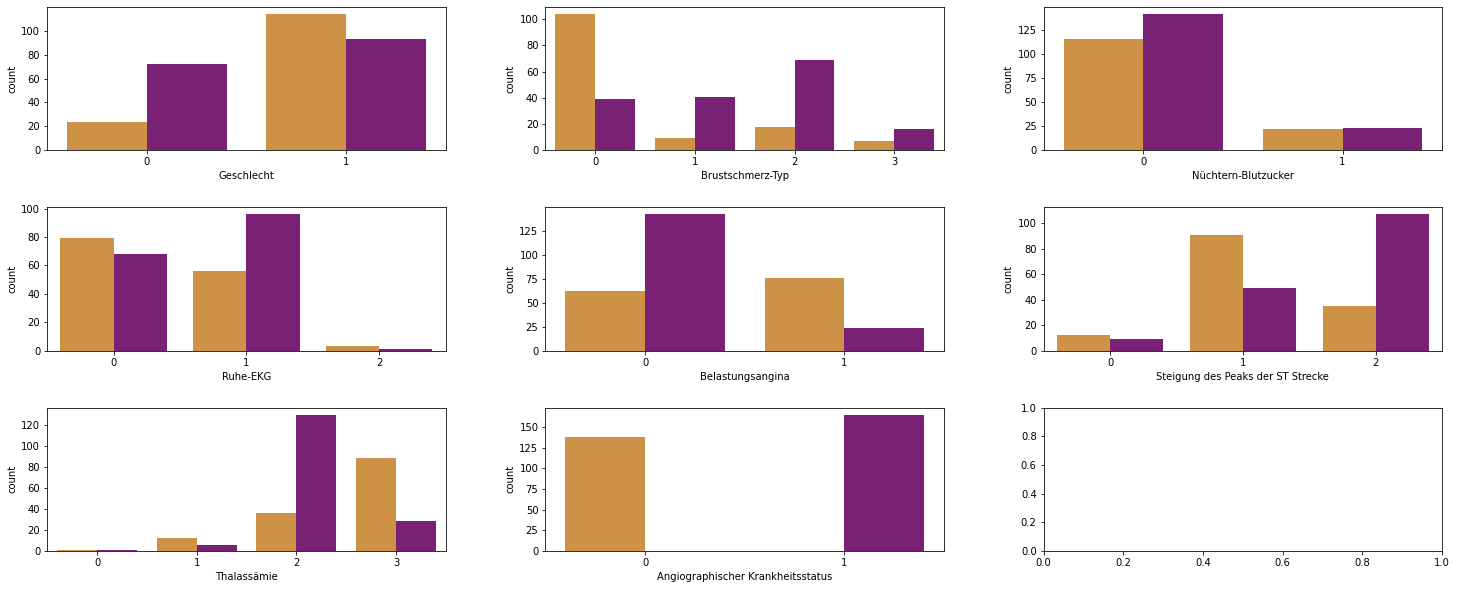

In [15]:
fig4 = plt.figure(figsize=(25, 10))
gs4 = fig4.add_gridspec(num_row, y_max)
gs4.update(wspace=0.25, hspace=0.4)

sub_p = []

for row in range(num_row):
    for col in range(y_max):
        sp_tmp = fig4.add_subplot(gs4[row,col])
        sub_p.append(sp_tmp)

i = 0
for para in cat_data:
    sns.countplot(x=cat_data[para], data=cat_data, hue=t_name , ax=sub_p[i], palette=[color0,color1])
    sub_p[i].get_legend().remove()
    i += 1

#### Beobachtungen

Aus der Visualisierung der Daten lässt sich schließen, dass es Parameter gibt die eine größeren Einfluss auf die Klassifizierung haben wie andere. Z.B. zeigen das Alter, die Anzahl der großen Blutgefäße, das Geschlecht und der brustschmerz-Typ einen großen Unterschied für die beiden Klassifikationsmöglichkeiten auf.
<br /><br />
Außerdem liegen alle kategorischen Einträge als Zahlenwerte vor. Demnach muss hier keine Umwandlung stattfinden.
<br /><br />
Beim Cholesterin scheint es einen Ausreißer zu geben.

## Methoden

In [16]:
def createModels(x_train, y_train):
    lr = LinearRegression().fit(x_train,y_train)
    ridger = Ridge().fit(x_train,y_train)
    b_ridge = BayesianRidge().fit(x_train,y_train)
    # Konvergiert nicht
    logr = LogisticRegression(random_state=7).fit(x_train,y_train)
    sgdr = SGDRegressor(random_state=7).fit(x_train,y_train)

    ridegc = RidgeClassifier().fit(x_train,y_train)
    sgdc = SGDClassifier(random_state=7).fit(x_train,y_train)


    svr = SVR().fit(x_train,y_train)
    nusvr = NuSVC().fit(x_train,y_train)

    svc = SVC().fit(x_train,y_train)
    nusvc = NuSVC().fit(x_train,y_train)


    knr = KNeighborsRegressor().fit(x_train,y_train)

    knc = KNeighborsClassifier().fit(x_train,y_train)
    nc = NearestCentroid().fit(x_train,y_train)


    gnb = GaussianNB().fit(x_train,y_train)


    dtr = DecisionTreeRegressor(random_state=7).fit(x_train,y_train)

    dtc = DecisionTreeClassifier(random_state=7).fit(x_train,y_train)


    rf = RandomForestRegressor(random_state=7).fit(x_train,y_train)

    rc = RandomForestClassifier(random_state=7).fit(x_train,y_train)


    # In einer Liste zusammenführen
    reg_models = [lr, ridger, b_ridge, logr, sgdr, svr, nusvr, knr, dtr, rf]
    class_models = [ridegc, sgdc, svc, nusvc, knc, nc, gnb, dtc, rc]
    return reg_models, class_models

### Evaluation Regression

Verwendete Metriken:
- MSE (möglichst klein)
- R2 (1.0 oder 100% bester Wert)
- Accuracy (1.0 oder 100% bester Wert)

Für die Regression wird der MSE und der R2 als Metrik verwendet. <br />
Der MSE wird verwendet, da er den durchschnittlichen quadrierten Fehler zwischen der beobachteten und der vorhergesagten Werte ist. Dieser ist einer der beliebtesten Metriken für die Regression. <br />
Der R2 (r squared) wird als zusätliche Metrik verwendet, da der MSE nur möglichst klein werden soll, und gibt eine Aussage über die reale Annäherung an die realen Datenpunkte an. Ebenso ist sie der Standardbewertung in scikit-learn für Regression. <br />
Für die Genauigkeit werden die Werte ab der Hälfte aufgerundet anderenfalls abgerundet, um die binäre Ausgabe beizubehalten.

In [17]:
def eval_reg_models(reg_models, x_test, y_test):
    rnp_col = ["Name", "MSE", "R2", "Accuracy"]
    reg_np = pd.DataFrame(columns=rnp_col)

    for m in reg_models:
        name = m.__class__.__name__
        mse = -cross_val_score(m, x_test, y_test, scoring="neg_mean_squared_error").mean()
        r2 = cross_val_score(m, x_test, y_test, scoring="r2").mean()
        #evar = cross_val_score(m, x_test, y_test, scoring="explained_variance").mean()

        pred = m.predict(x_test)
        pred = [0 if x < 0.5 else 1 for x in pred]
        acc = metrics.accuracy_score(y_test, pred)

        reg_np = reg_np.append(pd.DataFrame([[name, mse, r2 * 100, acc * 100]], columns=rnp_col), ignore_index=True)
    return reg_np

### Evaluation Klassifikation

<a id='metrik_class'></a>
erwendete Metriken:
- Accuracy (1.0 oder 100% bester Wert)
- Balanced F-score (1.0 oder 100% bester Wert)

In scikit-learn ist die Standardmetrik für die Klassifikation die Genauigkeit (accuracy).
Da der Genauigkeitswert (accuracy) nicht aussagekräftig genug von sich aus ist, wird hier der Balanced F-Score zusätzlich verwendet, da dieser die Genauigigkeit (precision) mit der Trefferquote (recall) kombiniert.
<br />
Hierbei ist die Genauigigkeit (precision) definiert als die korrekt positiven Ergebnisse geteilt durch die vorhergesagten positiven Ergebnisse.
<br />
Die Trefferquote (recall) wird definiert als die korrekten positiven Ergebnisse durch die Anzahl der als positiv zu identifizierenden Werte.

In [18]:
def eval_class_models(class_models, x_test, y_test):
    cnp_col = ["Name", "Accuracy", "F1"]
    cl_np = pd.DataFrame(columns=cnp_col)

    for m in class_models:
        name = m.__class__.__name__
        acc = cross_val_score(m, x_test, y_test, scoring="accuracy").mean()
        #av_pre = cross_val_score(m, x_test, y_test, scoring="average_precision").mean()
        f1 = cross_val_score(m, x_test, y_test, scoring="f1").mean()
        
        cl_np = cl_np.append(pd.DataFrame([[name, acc * 100, f1 * 100]], columns=cnp_col), ignore_index=True)
    return cl_np

## Erste Modelle (ohne Bearbeitung der Daten)

### Trennen der Daten in Eingabe und Ausgabe

In [19]:
x = data.drop(t_name, axis=1)
y = data[t_name]

### Aufteilen der Daten in Test und Training

In [20]:
x_tr, x_te, y_tr, y_te = train_test_split(x,y, test_size=0.2, random_state=7)

### Training

In [21]:
reg_models, class_models = createModels(x_tr, y_tr)

### Auswertung der trainierten Daten

#### Regression

In [22]:
eval_reg_models(reg_models, x_te, y_te)

,Name,MSE,R2,Accuracy
0,LinearRegression,0.2255,0.1522,75.4098
1,Ridge,0.2097,7.8467,75.4098
2,BayesianRidge,0.2164,5.5148,75.4098
3,LogisticRegression,0.2641,-5.7143,73.7705
4,SGDRegressor,4224983699871615077874401280.0000,-1860369339075834924382862442496.0000,50.8197
5,SVR,0.2461,-8.4875,63.9344
6,NuSVC,0.3090,-23.8095,75.4098
7,KNeighborsRegressor,0.2591,-13.0483,55.7377
8,DecisionTreeRegressor,0.3128,-37.0238,70.4918
9,RandomForestRegressor,0.1815,21.2205,65.5738


Die Regression liefert für die unvorverarbeiteten Daten schlechte Werte. Die meisten R2 Metriken liegen sogar im Negativen. Dies läasst sich auf das ursprüngliche Problem zurückführen, da eigentlich eine binäre Klassifikation erwartet wird.

#### Klassifikation

In [23]:
eval_class_models(class_models, x_te, y_te)

,Name,Accuracy,F1
0,RidgeClassifier,75.2564,75.0758
1,SGDClassifier,63.7179,64.8039
2,SVC,59.1026,66.1905
3,NuSVC,69.1026,69.0989
4,KNeighborsClassifier,59.1026,59.3240
5,NearestCentroid,64.1026,65.5092
6,GaussianNB,75.1282,72.4242
7,DecisionTreeClassifier,68.7179,66.5672
8,RandomForestClassifier,73.5897,72.0967


Gaussian Naive Bayes, Random Forest Classifier und Ridge Classifier liefern auf den unvorverarbeiteten Daten schon brauchbare Modelle mit einer Genauigkeit von über 70%.

## Preprocessed Data

### Skalieren und Trennen

In [24]:
mm_scaler = MinMaxScaler()

ppx = mm_scaler.fit_transform(x)
# Da y schon binär vorliegt, muss es nicht bearbeitet werden

ppx_tr, ppx_te, ppy_tr, ppy_te = train_test_split(ppx,y, test_size=0.2, random_state=7)

### Training

In [25]:
ppreg_models, ppclass_models = createModels(ppx_tr, ppy_tr)

### Auswertung

#### Regression

In [26]:
eval_reg_models(ppreg_models, ppx_te, ppy_te)

,Name,MSE,R2,Accuracy
0,LinearRegression,0.2255,0.1522,75.4098
1,Ridge,0.1844,19.6560,73.7705
2,BayesianRidge,0.1859,19.1114,73.7705
3,LogisticRegression,0.2474,0.9524,73.7705
4,SGDRegressor,0.2125,5.3451,72.1311
5,SVR,0.1889,17.9806,77.0492
6,NuSVC,0.2603,-4.2857,77.0492
7,KNeighborsRegressor,0.2087,8.6267,81.9672
8,DecisionTreeRegressor,0.3128,-37.0238,70.4918
9,RandomForestRegressor,0.1826,20.7253,65.5738


Gegenüber der Regression ohne Vorverarbeitung gibt es einige Verbesserungen bezüglich der MSE und R2 Metrik, die Genauigkeit ist in den meisten Fällen gleich geblieben oder hat sich verbessert. Nur die beiden Ridge Regressionen sind leicht schlechter geworden.

#### Klassifikation

In [27]:
eval_class_models(ppclass_models, ppx_te, ppy_te)

,Name,Accuracy,F1
0,RidgeClassifier,73.5897,73.7937
1,SGDClassifier,67.3077,64.5732
2,SVC,73.8462,73.6563
3,NuSVC,73.9744,73.9161
4,KNeighborsClassifier,73.5897,75.8641
5,NearestCentroid,73.7179,76.4029
6,GaussianNB,75.1282,72.4242
7,DecisionTreeClassifier,67.0513,65.4683
8,RandomForestClassifier,75.2564,75.0058


Nach der Vorverarbeitung ist die Durchschnittliche Genauigkeit gestiegen, aber beim Ridge Classifier und dem Decision Tree Classifier leicht gefallen.

## Gittersuche

### Zielmetrik und Hyperparameter

Da die Suchzeit je nach Anzahl der Parameter und des Algorithmus länger dauern kann wird die Aufgabe der Abhängigkeit von Zielmetrik und Hyperparameter an diese Stelle vorgezogen. <br />
Es wird der Random Forest Classifier verwendet und hier als Paramete die Anzahl der Bäume im Wald. Als Zielmetriken werden die im Abschnitt Evaluation Klassifikation Erwähnten verwendet.

<AxesSubplot:>

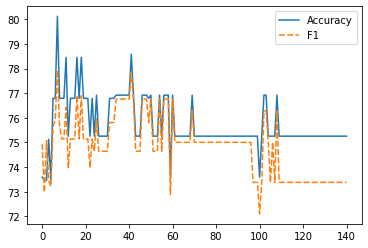

In [28]:
rfc_m = RandomForestClassifier()

measurement_col = ["Accuracy", "F1"]
measurement = pd.DataFrame(columns=measurement_col)
measurement.index.names = ["Anzahl Bäume"]

for n in range(5,146):
    params_rfcm = {"n_estimators" : int(n), "random_state" : 7}
    rfc_m.set_params(**params_rfcm)
    m = rfc_m.fit(ppx,y)

    acc = cross_val_score(m, ppx_te, ppy_te, scoring="accuracy").mean()
    f1 = cross_val_score(m, ppx_te, ppy_te, scoring="f1").mean()

    measurement = measurement.append(pd.DataFrame([[acc * 100, f1 * 100]], columns=measurement_col, index=[int(n)]), ignore_index=True)


sns.lineplot(data= measurement)

### Suchzeit für die Klassifikations-Algorithmen

Auf Grund der nahezu gleichen Genauigkeit der Klassifikationsalgorithmen werden für die Gittersuche alle Algorithmen verwendet. Da in diesem Fall eine binäre Klassifikation vorzufinden ist und die Metriken nicht gut anwendbar sind, werden die Regressionsverfahren nicht weiter betrachtet. <br />
Es werden die oben vorverarbeiteten Daten wiederverwendet und als Zielmetriken die im Abschnitt Evaluation Klassifikation Erwähnten verwendet.

In [29]:
max_para = 32

def para_grid(est, param,):
    ret = []
    for i in range(max_para, 0, -1):
        t_start = time.process_time()
        GridSearchCV(estimator=est,param_grid=param, scoring=["accuracy", "f1"],refit="accuracy",n_jobs=i).fit(ppx,y)
        t_end = time.process_time()
        #print(str(i) + ": " + str(t_end - t_start))
        ret.append([i, t_end - t_start])
    df = pd.DataFrame(ret, columns=["Kerne", "Zeit"])
    print(est.__class__.__name__)
    sns.lineplot(x = df["Kerne"], y=df["Zeit"])
    return df
        


RidgeClassifier


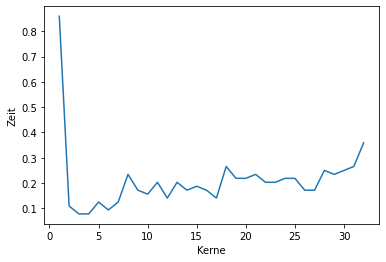

In [30]:
ridge_params = {"alpha": np.linspace(0,1,11), "solver": ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
ridge_df = para_grid(RidgeClassifier(),ridge_params)

NearestCentroid


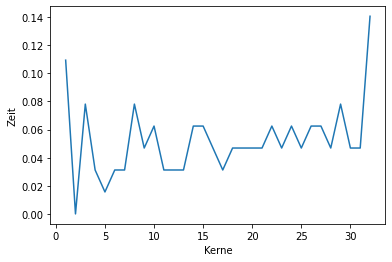

In [31]:
nc_params = {"metric": ["euclidean", "manhattan", "chebyshev", "minkowski", "wminkowski", "seuclidean", "mahalanobis"], "shrink_threshold" : [True,False]}
nc_df = para_grid(NearestCentroid(), nc_params)

GaussianNB


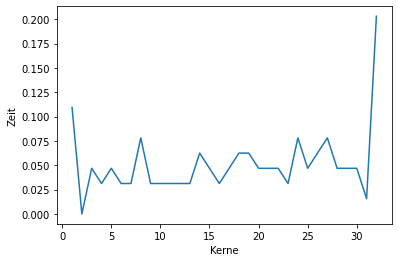

In [32]:
gnb_params = {"var_smoothing" : [10**x for x in range(-1,-15,-1)]}
gnb_params = para_grid(GaussianNB(), gnb_params)

#### Komplexere Modelle

Sollten mehrere Parameter gegeben sein, wird immer nur der erste betrachtet.

SGDClassifier


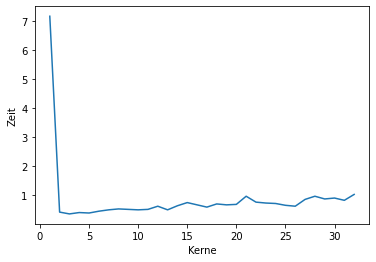

In [33]:
sgdc_params = [
    {"penalty" : ["l2","l1"], "alpha" : [10**x for x in [-5,-4,-3,-2,-1]], "epsilon" : np.linspace(0,1,11), "loss" : ['huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'], "learning_rate" : ["optimal"]},
    {"penalty" : ["l2","l1"], "alpha" : [10**x for x in [-5,-4,-3,-2,-1]], "loss" : ['hinge', 'log', 'modified_huber','squared_hinge','perceptron', 'squared_loss'], "learning_rate" : ["optimal"]},
    {"penalty" : ["elasticnet"], "l1_ratio" : np.linspace(0,1,11), "alpha" : [10**x for x in [-5,-4,-3,-2,-1]], "epsilon" : np.linspace(0,1,11), "loss" : ['huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'], "learning_rate" : ["optimal"]},
    {"penalty" : ["elasticnet"], "l1_ratio" : np.linspace(0,1,11), "alpha" : [10**x for x in [-5,-4,-3,-2,-1]], "loss" : ['hinge', 'log', 'modified_huber','squared_hinge','perceptron', 'squared_loss'], "learning_rate" : ["optimal"]},
    {"penalty" : ["l2","l1"], "alpha" : [10**x for x in [-5,-4,-3,-2,-1]], "epsilon" : np.linspace(0,1,11), "loss" : ['huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'], "learning_rate" : ["constant", "invscaling", "adaptive"], "eta0" : np.linspace(0.1,1,10)},
    {"penalty" : ["l2","l1"], "alpha" : [10**x for x in [-5,-4,-3,-2,-1]], "loss" : ['hinge', 'log', 'modified_huber','squared_hinge','perceptron', 'squared_loss'], "learning_rate" : ["constant", "invscaling", "adaptive"], "eta0" : np.linspace(0.1,1,10)},
    {"penalty" : ["elasticnet"], "l1_ratio" : np.linspace(0,1,11), "alpha" : [10**x for x in [-5,-4,-3,-2,-1]], "epsilon" : np.linspace(0,1,11), "loss" : ['huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'], "learning_rate" : ["constant", "invscaling", "adaptive"], "eta0" : np.linspace(0.1,1,10)},
    {"penalty" : ["elasticnet"], "l1_ratio" : np.linspace(0,1,11), "alpha" : [10**x for x in [-5,-4,-3,-2,-1]], "loss" : ['hinge', 'log', 'modified_huber','squared_hinge','perceptron', 'squared_loss'], "learning_rate" : ["constant", "invscaling", "adaptive"], "eta0" : np.linspace(0.1,1,10)},
]
sgdc_df = para_grid(SGDClassifier(), sgdc_params[0])

SVC


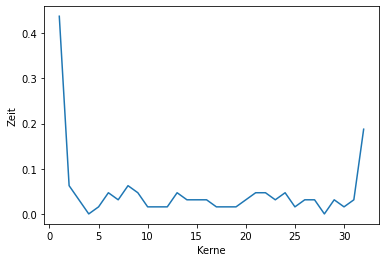

In [34]:
svc_params = [
    {"C": [10**x for x in range(0,4)], "kernel": ["linear"]},
    {"C": [10**x for x in range(0,4)], "kernel": ["poly"], "degree" : np.linspace(1,10,10), "gamma": ["scale"] + np.linspace(0,1,11).tolist(), "coef0" : np.linspace(0,1,11)},
    {"C": [10**x for x in range(0,4)], "kernel": ["rbf"], "gamma": ["scale"] + np.linspace(0,1,11).tolist()},
    {"C": [10**x for x in range(0,4)], "kernel": ["sigmoid"], "gamma": ["scale"] + np.linspace(0,1,11).tolist(), "coef0" : np.linspace(0,1,11)}
]
svc_df = para_grid(SVC(), svc_params[0])

NuSVC


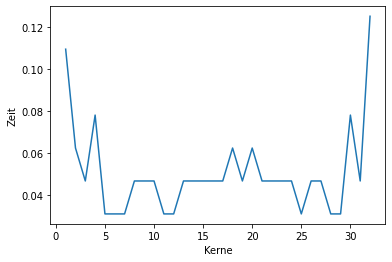

In [35]:
nusvc_params = [
    {"nu": np.linspace(0.1,1,10), "kernel": ["linear"]},
    {"nu": np.linspace(0.1,1,10), "kernel": ["poly"], "degree" : np.linspace(1,10,10), "gamma": ["scale"] + np.linspace(0,1,11).tolist(), "coef0" : np.linspace(0,1,11)},
    {"nu": np.linspace(0.1,1,10), "kernel": ["rbf"], "gamma": ["scale"] + np.linspace(0,1,11).tolist()},
    {"nu": np.linspace(0.1,1,10), "kernel": ["sigmoid"], "gamma": ["scale"] + np.linspace(0,1,11).tolist(), "coef0" : np.linspace(0,1,11)}
]
nusvc_df = para_grid(NuSVC(), nusvc_params[0])

KNeighborsClassifier


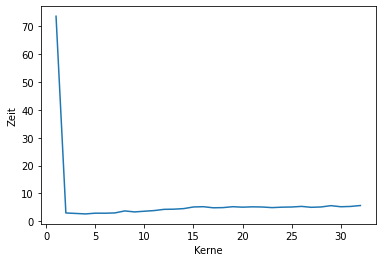

In [36]:
knc_params = [
    {"n_neighbors" : np.linspace(1,15,15).astype(int), "algorithm" : ["ball_tree", "kd_tree"], "leaf_size" : np.linspace(2,50,49), "metric": ["euclidean", "manhattan", "chebyshev"]},
    {"n_neighbors" : np.linspace(1,15,15).astype(int), "algorithm" : ["auto", "brute"], "metric": ["euclidean", "manhattan", "chebyshev"]},
    {"n_neighbors" : np.linspace(1,15,15).astype(int), "algorithm" : ["ball_tree", "kd_tree"], "leaf_size" : np.linspace(2,50,49), "metric": ["minkowski"], "p": np.linspace(1,5,5)},
    {"n_neighbors" : np.linspace(1,15,15).astype(int), "algorithm" : ["auto", "brute"], "metric": ["minkowski"], "p": np.linspace(1,5,5)}
]
knc_df = para_grid(KNeighborsClassifier(), knc_params[0])

DecisionTreeClassifier


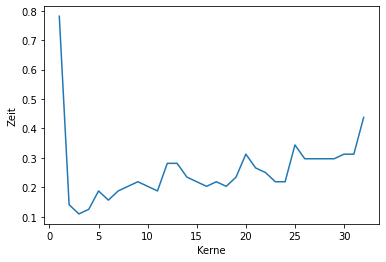

In [37]:
dtc_params = {"criterion" : ["gini", "entropy"], "splitter" : ["best", "random"], "max_depth" : range(2,11), "max_features" : ["auto", "sqrt", "log2"]}
dtc_df = para_grid(DecisionTreeClassifier(), dtc_params)

Einschränkung der Anzahl der Bäume, da im Kapitel Zielmetrik und Hyperparameter gut zu erkennen ist, dass ein guter Wert bei unter 20 liegt.

RandomForestClassifier


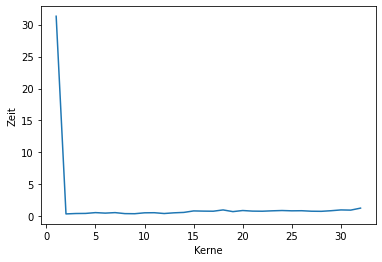

In [38]:
rfc_params = {"n_estimators" : range(5,76) , "criterion" : ["gini", "entropy"], "max_depth" : range(2,11), "max_features" : ["auto", "sqrt", "log2"]}
# Damit die Rechenzeit nicht zu lange wird etwas reduziert
rfc_params_red = {"n_estimators" : range(5,46) , "criterion" : ["gini", "entropy"], "max_features" : ["auto", "sqrt", "log2"]}
rfc_df = para_grid(RandomForestClassifier(), rfc_params_red)